In [15]:
# Data manipulations
import pandas as pd
import numpy as np
import utils
# Data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio

# Data pre-processing
import missingno as msno
from sklearn.preprocessing import LabelEncoder  
from sklearn.impute import SimpleImputer

# Date handller
import time
from datetime import datetime, timedelta, date

# For serialization and warning purpose
import pickle
import warnings
warnings.filterwarnings('ignore')
pio.renderers.default='notebook' # charts export to HTML
# pd.set_option('display.height', 500)
# pd.set_option('display.max_rows', 500)
# pd.reset_option('display.max_rows')  OR pd.reset_option('all')

/var/folders/7x/ghgnv3fd73d8nnd3dbm1bpvc0000gn/T/ipykernel_2480/1940575012.py:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [14]:
pip install -U scikit-learn scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
df = pd.read_csv("./df.csv")

In [19]:
df

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,2022,10,31,0,0,0,4,2,68,0,81,76.61,40.00
1,2022,9,29,3,0,0,1,2,55,1,100,88.65,110.30
2,2022,5,13,4,0,0,2,6,0,1,100,115.42,159.00
3,2022,5,25,2,0,0,2,7,78,0,100,88.40,96.75
4,2022,6,24,4,0,0,1,2,4,0,100,128.01,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31440,2022,7,27,2,0,0,1,6,55,1,98,90.77,101.75
31441,2022,10,3,0,0,0,5,5,3,0,100,84.11,70.00
31442,2022,5,23,0,0,0,1,2,0,0,88,85.50,114.00
31443,2022,3,24,3,0,0,1,3,15,1,99,83.38,85.00


In [21]:
print(df[df['Year']==2021])

       Year  Month  Days  DayOfWeek  IsWeekend  IsHoliday  Nights  Type  \
18     2021      8    23          0          0          0       1     5   
24     2021      8    26          3          0          0       3     7   
27     2021      5    16          6          1          0       5     5   
32     2021      4    13          1          0          0       1     2   
33     2021      3    19          4          0          0       2     2   
...     ...    ...   ...        ...        ...        ...     ...   ...   
31415  2021      4    13          1          0          0       1     3   
31418  2021      4    24          5          1          0       1     2   
31432  2021      9    13          0          0          0       1     2   
31435  2021      6     7          0          0          0       3     3   
31444  2021      1    14          3          0          0       1     2   

       RateCode  TrackCode  Occupied     ADR   Rate  
18            5          0        96   76.81 

In [18]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
df = df[df['Year']==2022]

In [11]:
df

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,2022,10,31,0,0,0,4,2,68,0,81,76.61,40.00
1,2022,9,29,3,0,0,1,2,55,1,100,88.65,110.30
2,2022,5,13,4,0,0,2,6,0,1,100,115.42,159.00
3,2022,5,25,2,0,0,2,7,78,0,100,88.40,96.75
4,2022,6,24,4,0,0,1,2,4,0,100,128.01,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31439,2022,5,15,6,1,0,5,2,25,0,96,84.20,70.00
31440,2022,7,27,2,0,0,1,6,55,1,98,90.77,101.75
31441,2022,10,3,0,0,0,5,5,3,0,100,84.11,70.00
31442,2022,5,23,0,0,0,1,2,0,0,88,85.50,114.00


In [12]:
# df.drop([], axis=1, inplace=True)

In [13]:
df.describe()

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
count,26348.0,26348.000000,26348.000000,26348.000000,26348.000000,26348.0,26348.000000,26348.000000,26348.000000,26348.000000,26348.000000,26348.000000,26348.000000
mean,2022.0,6.618681,15.635039,3.227797,0.311637,0.0,1.702065,3.288371,33.958479,0.991195,94.669045,101.711015,105.382053
std,0.0,3.396753,8.787688,1.980920,0.463171,0.0,1.977798,1.694635,33.408443,1.010289,9.237113,24.340976,37.203484
min,2022.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,54.000000,32.560000,0.000000
25%,2022.0,4.000000,8.000000,2.000000,0.000000,0.0,1.000000,2.000000,1.000000,0.000000,93.000000,83.510000,70.962500
50%,2022.0,7.000000,16.000000,4.000000,0.000000,0.0,1.000000,3.000000,24.000000,1.000000,100.000000,91.590000,99.000000
75%,2022.0,10.000000,23.000000,5.000000,1.000000,0.0,2.000000,4.000000,64.000000,1.000000,100.000000,119.760000,125.000000
max,2022.0,12.000000,31.000000,6.000000,1.000000,0.0,135.000000,7.000000,107.000000,4.000000,100.000000,173.640000,999.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26348 entries, 0 to 31443
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       26348 non-null  int64  
 1   Month      26348 non-null  int64  
 2   Days       26348 non-null  int64  
 3   DayOfWeek  26348 non-null  int64  
 4   IsWeekend  26348 non-null  int64  
 5   IsHoliday  26348 non-null  int64  
 6   Nights     26348 non-null  int64  
 7   Type       26348 non-null  int64  
 8   RateCode   26348 non-null  int64  
 9   TrackCode  26348 non-null  int64  
 10  Occupied   26348 non-null  int64  
 11  ADR        26348 non-null  float64
 12  Rate       26348 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 2.8 MB


In [15]:
# df['Rate'] = df['Rate'].round().astype('int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26348 entries, 0 to 31443
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       26348 non-null  int64  
 1   Month      26348 non-null  int64  
 2   Days       26348 non-null  int64  
 3   DayOfWeek  26348 non-null  int64  
 4   IsWeekend  26348 non-null  int64  
 5   IsHoliday  26348 non-null  int64  
 6   Nights     26348 non-null  int64  
 7   Type       26348 non-null  int64  
 8   RateCode   26348 non-null  int64  
 9   TrackCode  26348 non-null  int64  
 10  Occupied   26348 non-null  int64  
 11  ADR        26348 non-null  float64
 12  Rate       26348 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 2.8 MB


## sort_values by Month

In [17]:
df.sort_values('Month', inplace=True)

In [18]:
df.head(10)

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
9728,2022,1,22,5,1,0,1,3,1,1,100,120.28,125.00
10577,2022,1,25,1,0,0,1,7,107,3,93,75.62,76.00
9131,2022,1,5,2,0,0,1,1,64,1,82,73.67,80.75
27854,2022,1,3,0,0,0,1,3,9,1,93,73.59,74.76
15779,2022,1,13,3,0,0,1,3,24,0,98,91.08,70.00
27851,2022,1,24,0,0,0,1,1,64,1,85,74.37,85.64
22446,2022,1,29,5,1,0,1,2,25,0,100,122.01,70.00
22420,2022,1,16,6,1,0,1,1,58,3,99,83.51,99.05
27839,2022,1,5,2,0,0,1,2,0,1,82,73.67,90.00
5213,2022,1,8,5,1,0,1,3,1,1,100,108.21,89.00


In [19]:
df.reset_index(inplace=True)

In [20]:
df

,index,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,9728,2022,1,22,5,1,0,1,3,1,1,100,120.28,125.00
1,10577,2022,1,25,1,0,0,1,7,107,3,93,75.62,76.00
2,9131,2022,1,5,2,0,0,1,1,64,1,82,73.67,80.75
3,27854,2022,1,3,0,0,0,1,3,9,1,93,73.59,74.76
4,15779,2022,1,13,3,0,0,1,3,24,0,98,91.08,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26343,29552,2022,12,12,0,0,0,1,7,71,4,85,84.80,89.10
26344,21157,2022,12,24,5,1,0,4,6,96,0,76,89.42,127.20
26345,1099,2022,12,7,2,0,0,1,2,41,3,80,80.65,93.60
26346,1106,2022,12,4,6,1,0,1,1,25,0,95,105.30,70.00


In [21]:
df.drop(['index'], axis=1, inplace=True)

## Data distribution analysis

<AxesSubplot: xlabel='RateCode', ylabel='Density'>

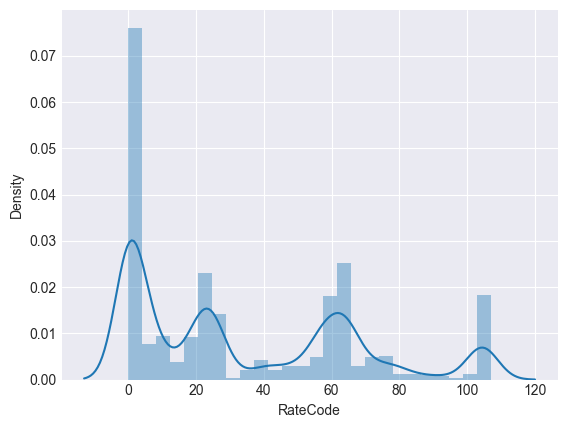

In [22]:
sns.distplot(df['RateCode'])

<AxesSubplot: xlabel='RateCode', ylabel='Density'>

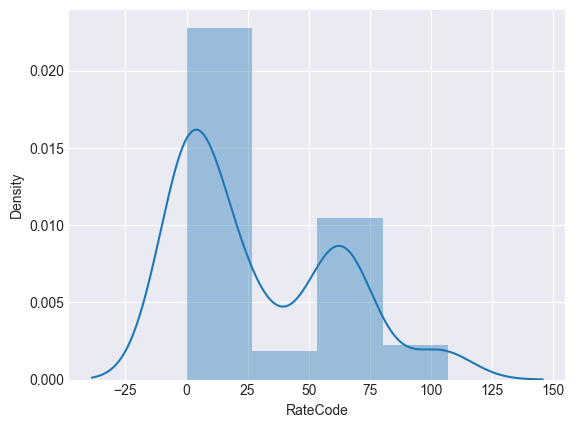

In [23]:
sns.distplot(df['RateCode'].head(100))

<AxesSubplot: xlabel='Occupied', ylabel='Density'>

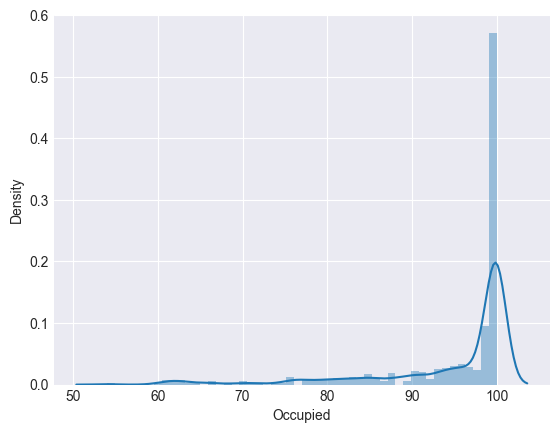

In [24]:
sns.distplot(df['Occupied'])

<AxesSubplot: xlabel='Occupied', ylabel='Density'>

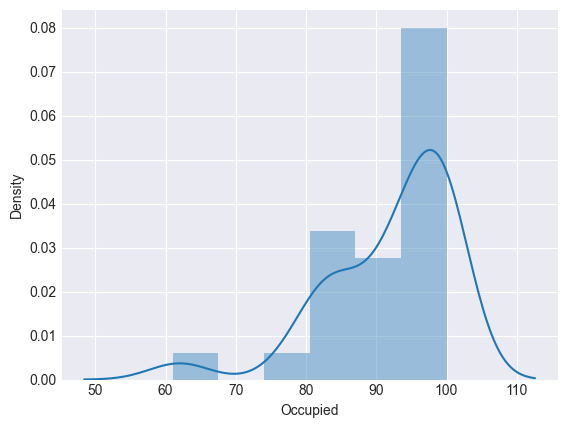

In [25]:
sns.distplot(df['Occupied'].head(50))

#### * high fluctuation in 'Occupied', 'RateCode' need to normalize this columns

#### * 'Days" is the issue now, we have day of month but not week of the month, so we need week of the month as well, can drop "Day" column

In [26]:
ex = df.copy(deep=True)

## Adding dates column to find week number

In [27]:
ex

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,2022,1,22,5,1,0,1,3,1,1,100,120.28,125.00
1,2022,1,25,1,0,0,1,7,107,3,93,75.62,76.00
2,2022,1,5,2,0,0,1,1,64,1,82,73.67,80.75
3,2022,1,3,0,0,0,1,3,9,1,93,73.59,74.76
4,2022,1,13,3,0,0,1,3,24,0,98,91.08,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26343,2022,12,12,0,0,0,1,7,71,4,85,84.80,89.10
26344,2022,12,24,5,1,0,4,6,96,0,76,89.42,127.20
26345,2022,12,7,2,0,0,1,2,41,3,80,80.65,93.60
26346,2022,12,4,6,1,0,1,1,25,0,95,105.30,70.00


In [28]:
dates = []
for y, m , d  in zip(ex['Year'], ex['Month'], ex['Days']):

    date=str(y)+'-'+str(m)+'-'+str(d)
    dates.append(date)
print(len(date))

10


In [29]:
ex['Dates'] = dates
ex["Dates"] = pd.to_datetime(dates)

In [31]:
ex

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate,Dates
0,2022,1,22,5,1,0,1,3,1,1,100,120.28,125.00,2022-01-22
1,2022,1,25,1,0,0,1,7,107,3,93,75.62,76.00,2022-01-25
2,2022,1,5,2,0,0,1,1,64,1,82,73.67,80.75,2022-01-05
3,2022,1,3,0,0,0,1,3,9,1,93,73.59,74.76,2022-01-03
4,2022,1,13,3,0,0,1,3,24,0,98,91.08,70.00,2022-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26343,2022,12,12,0,0,0,1,7,71,4,85,84.80,89.10,2022-12-12
26344,2022,12,24,5,1,0,4,6,96,0,76,89.42,127.20,2022-12-24
26345,2022,12,7,2,0,0,1,2,41,3,80,80.65,93.60,2022-12-07
26346,2022,12,4,6,1,0,1,1,25,0,95,105.30,70.00,2022-12-04


## adding Week number

In [32]:
import calendar

In [33]:
calendar.setfirstweekday(6)

def get_week_of_month(year, month, day):
    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x==day)[0][0] + 1
    return(week_of_month)

In [34]:
weeks = []
for y, m , d  in zip(ex['Year'], ex['Month'], ex['Days']):

    week=get_week_of_month(y, m, d)
    weeks.append(week)


In [35]:
ex["week_number"] = weeks

In [36]:
ex

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate,Dates,week_number
0,2022,1,22,5,1,0,1,3,1,1,100,120.28,125.00,2022-01-22,4
1,2022,1,25,1,0,0,1,7,107,3,93,75.62,76.00,2022-01-25,5
2,2022,1,5,2,0,0,1,1,64,1,82,73.67,80.75,2022-01-05,2
3,2022,1,3,0,0,0,1,3,9,1,93,73.59,74.76,2022-01-03,2
4,2022,1,13,3,0,0,1,3,24,0,98,91.08,70.00,2022-01-13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26343,2022,12,12,0,0,0,1,7,71,4,85,84.80,89.10,2022-12-12,3
26344,2022,12,24,5,1,0,4,6,96,0,76,89.42,127.20,2022-12-24,4
26345,2022,12,7,2,0,0,1,2,41,3,80,80.65,93.60,2022-12-07,2
26346,2022,12,4,6,1,0,1,1,25,0,95,105.30,70.00,2022-12-04,2


In [37]:
ex.drop(['Dates', 'Year', 'IsHoliday', 'IsWeekend'], axis=1, inplace=True)

In [38]:
df1 = ex[['Month','Days','week_number', 'DayOfWeek', 'Nights', 'Type', 'RateCode', 'TrackCode', 'Occupied','ADR','Rate']]

In [39]:
df1

,Month,Days,week_number,DayOfWeek,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,1,22,4,5,1,3,1,1,100,120.28,125.00
1,1,25,5,1,1,7,107,3,93,75.62,76.00
2,1,5,2,2,1,1,64,1,82,73.67,80.75
3,1,3,2,0,1,3,9,1,93,73.59,74.76
4,1,13,3,3,1,3,24,0,98,91.08,70.00
...,...,...,...,...,...,...,...,...,...,...,...
26343,12,12,3,0,1,7,71,4,85,84.80,89.10
26344,12,24,4,5,4,6,96,0,76,89.42,127.20
26345,12,7,2,2,1,2,41,3,80,80.65,93.60
26346,12,4,2,6,1,1,25,0,95,105.30,70.00


<AxesSubplot: >

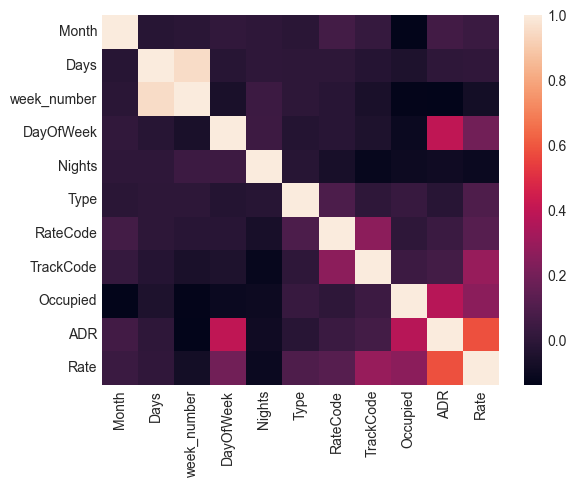

In [40]:
sns.heatmap(df1.corr())

## Remove outliers

In [41]:
def outlierRemoval(data, val1):
    percentile25 = data[val1].quantile(0.25)
    percentile75 = data[val1].quantile(0.75)
    iqr_range = percentile75 - percentile25
    upper_limit = round((percentile75 + 1.5 * iqr_range), 2)
    lower_limit = round((percentile25 - 1.5 * iqr_range), 2)

    print('Min value :{}\nMax value :{}'.format(lower_limit, upper_limit))
    
    data_e1 = data[(data[val1] < upper_limit) & (data[val1] > lower_limit)]
    
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(data[val1])
    plt.subplot(2,2,2)
    sns.boxplot(data[val1])
    plt.subplot(2,2,3)
    sns.distplot(data_e1[val1])
    plt.subplot(2,2,4)
    sns.boxplot(data_e1[val1])
    plt.show()

    return data_e1

Min value :-10.09
Max value :206.06


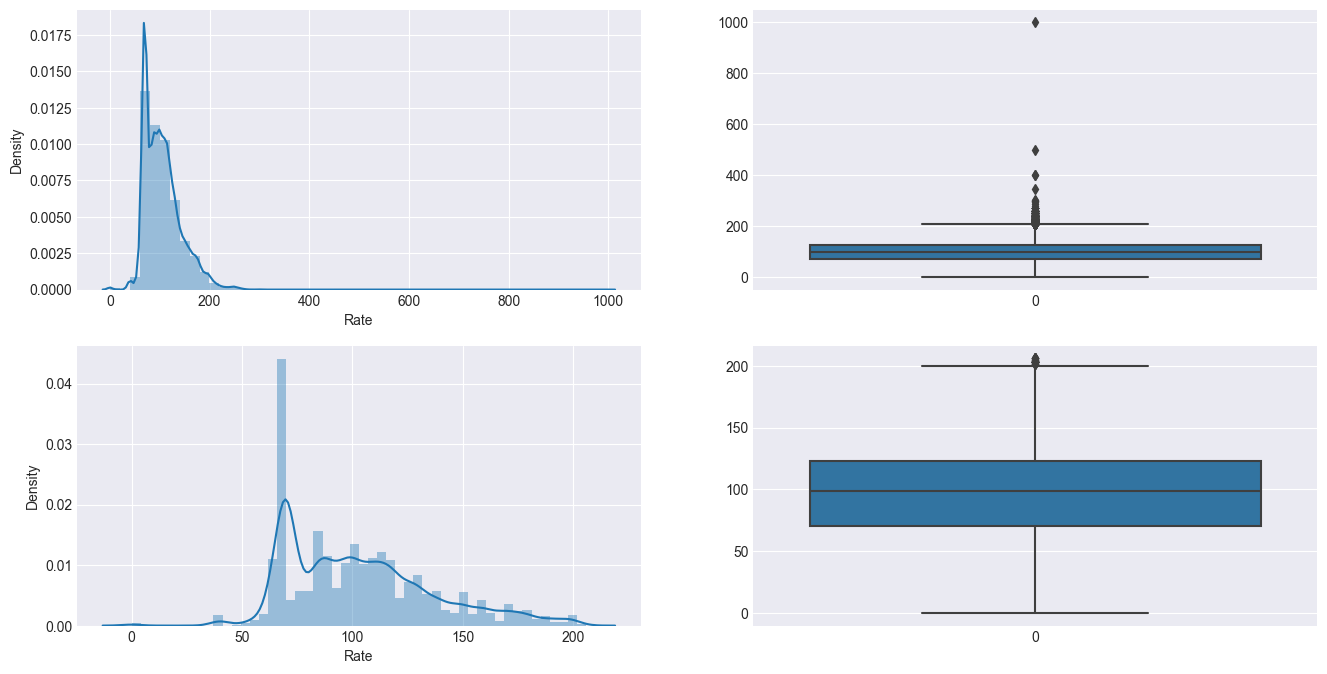

In [42]:
data1 = outlierRemoval(df1, 'Rate')

In [43]:
print('Original data shape         :', df1.shape)
print('Outlier removal data shape  :', data1.shape)
print('Total records removal (IQR) :', df1.shape[0]-data1.shape[0])

Original data shape         : (26348, 11)
Outlier removal data shape  : (25949, 11)
Total records removal (IQR) : 399


## Preparing data in X,Y

In [46]:
# ML algotithm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Evaluation matrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import shuffle

In [47]:
from sklearn.preprocessing import StandardScaler


In [48]:
X=data1.drop(columns=["Rate"], axis=1)
y=data1["Rate"]

# Normalizing data

In [ ]:
# ss = StandardScaler()
# X = ss.fit_transform(X)
# X


In [49]:
# Slpiting into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=15)
print('\nX_train size :{} \nX_test size  :{} \ny_train size :{} \ny_test size  :{}'.format(len(X_train),
                            len(X_test), len(y_train), len(y_test)))


X_train size :18164 
X_test size  :7785 
y_train size :18164 
y_test size  :7785


##  Modeling Part

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from pprint import pprint

In [51]:
# Function for ML computations

cv = 5         # CV value
algo = []      # algorithm name
r_2 = []       # R2 score (test)
CV = []        # CV scores mean
mae_value = [] # mae score
mse_value = [] # mse score
rmse_val = []  # rmse score
r2 = []        # R2 scorw (train)

# Main function for models
def model(algorithm, x_train_, y_train_, x_test_, y_test_, X, y):
    
    # start_time = timer(None)
    algorithm.fit(x_train_, y_train_)
    
    predicts = algorithm.predict(x_test_)
    # prediction = pd.DataFrame(predicts, columns=['Prediction'])
    
    kd = pd.DataFrame({'Actual':y_test_, 'Prediction':predicts})
    kd['Diff'] = round((kd.Actual - kd.Prediction), 2)
    
    R2 = algorithm.score(x_train_, y_train_)
    R_2 = r2_score(y_test_, predicts)
    
    cross_val = cross_val_score(algorithm, X, y, cv=cv)
    
    mae = mean_absolute_error(y_test_, predicts)
    mse = mean_squared_error(y_test_, predicts)
    rmse = np.sqrt(mean_squared_error(y_test_, predicts))
    
    # Appending results to Lists
    algo.append(algorithm)
    r2.append(R2) 
    CV.append(cross_val.mean()) 
    r_2.append(R_2)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_val.append(rmse)
    
    # Printing results  
    print('ML Algorithm     :', algorithm) 
    print("R2 Score (train) :", R2)
    print("R2 Score (test)  :", R_2)
    print("CV Scores        :", cross_val)
    print("CV Scores mean   :", cross_val.mean())
    print("MAE rate         :", mae)
    print("MSE rate         :", mse)
    print("RMSE rate        :", rmse)
                   
    # Plot for prediction vs originals
    sns.scatterplot(x=y_test_, y=predicts)
    plt.xlabel('y_test')
    plt.ylabel('Predicted')
    plt.show()
    
    # timer(start_time)
    return algorithm, kd

ML Algorithm     : RandomForestRegressor()
R2 Score (train) : 0.9537685381379992
R2 Score (test)  : 0.8094349793906452
CV Scores        : [0.71066371 0.78383193 0.68854285 0.75303838 0.68102636]
CV Scores mean   : 0.7234206460969805
MAE rate         : 8.352509380641473
MSE rate         : 210.27416655161394
RMSE rate        : 14.500833305421242


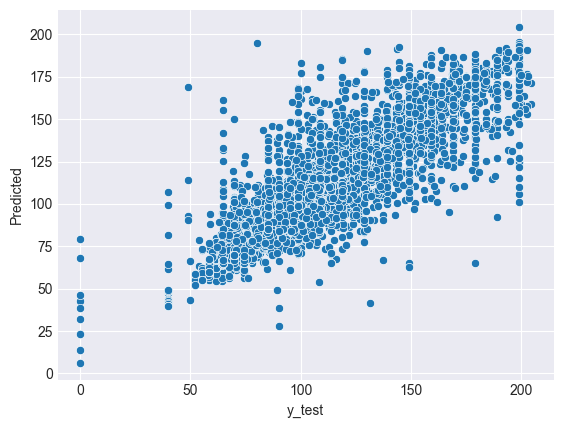

CPU times: user 36.6 s, sys: 1.1 s, total: 37.7 s
Wall time: 48.3 s


,Actual,Prediction,Diff
0,189.00,92.504000,96.50
1,123.70,109.027000,14.67
2,103.55,94.394677,9.16
3,70.00,70.000000,0.00
4,149.00,144.640833,4.36
...,...,...,...
7780,107.10,109.844300,-2.74
7781,98.80,98.964375,-0.16
7782,70.00,70.000000,0.00
7783,85.50,107.221842,-21.72


In [52]:
%%time
rf = RandomForestRegressor()
model_rf, df_rf = model(rf, X_train, y_train, X_test, y_test, X, y)
df_rf

ML Algorithm     : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
R2 Score (train) : 0.8910110787154649
R2 Score (test)  : 0.8256002127304476
CV Scores        : [0.72647547 0.79523816 0.70399557 0.76310433 0.71841456]
CV Scores mean   : 0.7414456166264465
MAE rate         : 8.969258009296238
MSE rate     

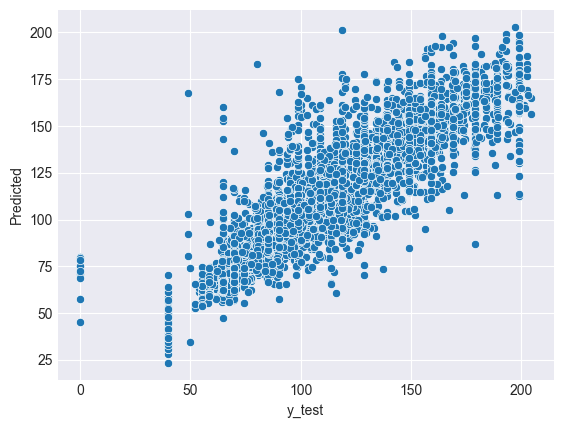

CPU times: user 28.6 s, sys: 727 ms, total: 29.3 s
Wall time: 9.6 s


,Actual,Prediction,Diff
0,189.00,113.377960,75.62
1,123.70,110.678024,13.02
2,103.55,98.088799,5.46
3,70.00,69.863396,0.14
4,149.00,143.180496,5.82
...,...,...,...
7780,107.10,101.692078,5.41
7781,98.80,105.210213,-6.41
7782,70.00,70.217163,-0.22
7783,85.50,102.343056,-16.84


In [53]:
%%time
xg = XGBRegressor()
model_xg, df_xg = model(xg, X_train, y_train, X_test, y_test, X, y)
df_xg

In [54]:
Model_interpretions = pd.DataFrame(list(zip(algo, r2, CV, r_2, mae_value, mse_value, rmse_val)),
    columns =['ML Algorithms', 'Training Score', 'CV Mean Score', 'Testing score', 'MAE Rate', 'MSE Rate', 'RMSE Rate'])

In [55]:
Model_interpretions = Model_interpretions.sort_values(by='Testing score', ascending=False)
Model_interpretions.reset_index(drop=True, inplace=True)
print(Model_interpretions['ML Algorithms'][0])
display(Model_interpretions)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


,ML Algorithms,Training Score,CV Mean Score,Testing score,MAE Rate,MSE Rate,RMSE Rate
0,"XGBRegressor(base_score=None, booster=None, ca...",0.891011,0.741446,0.825600,8.969258,192.437047,13.872168
1,"(DecisionTreeRegressor(max_features=1.0, rando...",0.953769,0.723421,0.809435,8.352509,210.274167,14.500833


In [56]:
model_evt = Model_interpretions['ML Algorithms'][0]
model_evt

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
base_model_1 = Model_interpretions['ML Algorithms'][0]
base_model_2 = Model_interpretions['ML Algorithms'][1]

In [58]:
# Model save
model_file_name = 'modelXGB84.sav'
pickle.dump(model_evt, open(model_file_name, 'wb'))

# load open
model_file_name = 'modelXGB84.sav'
loaded_model_base = pickle.load(open(model_file_name, 'rb'))
loaded_model_base

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [59]:
paramss = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7 ],
    "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7 ],
    "n_estimators" : [25, 50, 85, 150]
}

pprint(paramss)

{'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'n_estimators': [25, 50, 85, 150]}


In [60]:
%%time
base_model_2=XGBRegressor()
random_xgb = RandomizedSearchCV(base_model_2, param_distributions=paramss, n_iter=5, scoring='neg_mean_squared_error', 
                                return_train_score=True, cv=5, verbose=3)
random_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=25;, score=(train=-269.080, test=-279.496) total time=   1.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=25;, score=(train=-264.716, test=-284.900) total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=25;, score=(train=-267.462, test=-274.864) total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=25;, score=(train=-269.787, test=-273.614) total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=25;, score=(train=-267.725, test=-275.702) total time=   0.7s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [25, 50, 85, 150]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=3)

In [62]:
cvres = random_xgb.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

16.664798654669863 {'n_estimators': 25, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.5}
14.624335647174433 {'n_estimators': 25, 'min_child_weight': 7, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 0.2, 'colsample_bytree': 0.3}
15.303573777363265 {'n_estimators': 85, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.3}
18.41666080409518 {'n_estimators': 85, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.3}
14.511388953126637 {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.7}


In [63]:
print(random_xgb.best_estimator_, '\n\n',random_xgb.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 

 {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.7}


ML Algorithm     : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=12, max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=85, n_jobs=0,
             num_parallel_tree=1, predictor=None, random_state=0, ...)
R2 Score (train) : 0.9455690758659033
R2 Score (test)  : 0.8237067726717145
CV Scores        : [0.72289667 0.78825662 0.70483708 0.76154338 0.70337851]
CV Scores mean   : 0.736182451722846
MAE rate         : 8.581775607428186
MSE rate         : 194.52631614455746
RMSE rate     

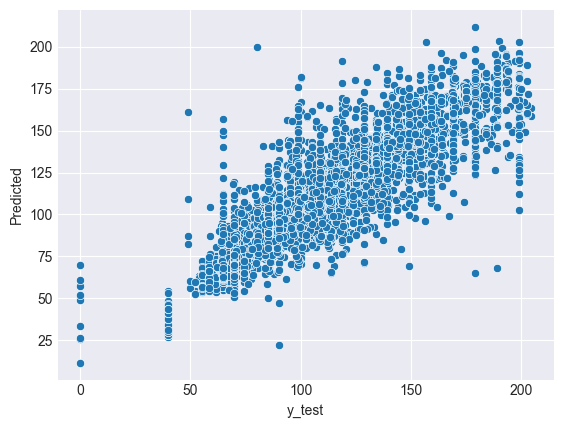

CPU times: user 35.8 s, sys: 1.47 s, total: 37.3 s
Wall time: 22.6 s


,Actual,Prediction,Diff
0,189.00,68.097534,120.90
1,123.70,112.709007,10.99
2,103.55,95.467545,8.08
3,70.00,70.238907,-0.24
4,149.00,150.464188,-1.46
...,...,...,...
7780,107.10,113.137489,-6.04
7781,98.80,100.378990,-1.58
7782,70.00,69.790131,0.21
7783,85.50,115.033417,-29.53


In [64]:
%%time 

xgb_tunned = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=12,
             min_child_weight=5,
             n_estimators=85, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
model_xgb_tunned, df_rf_xgb_tunned = model(xgb_tunned, X_train, y_train, X_test, y_test, X, y)
df_rf_xgb_tunned

In [65]:
paramss = {
    "learning_rate"    : [0.05, 0.15, 0.30 ] ,
    "max_depth"        : [ 3, 8, 15],
    "min_child_weight" : [ 1, 3, 5],
    "gamma"            : [ 0.0, 0.1,0.3],
    "n_estimators" : [50, 85, 150]
}

pprint(paramss)

{'gamma': [0.0, 0.1, 0.3],
 'learning_rate': [0.05, 0.15, 0.3],
 'max_depth': [3, 8, 15],
 'min_child_weight': [1, 3, 5],
 'n_estimators': [50, 85, 150]}


In [ ]:
# %%time
# random_xgb_grid = GridSearchCV(base_model_2, param_grid=paramss, scoring='neg_mean_squared_error', 
#                                 return_train_score=True, cv=3, verbose=3)
# random_xgb_grid.fit(X_train, y_train)

In [ ]:
# cvres = random_xgb_grid.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [ ]:
# print(random_xgb_grid.best_estimator_, '\n\n',random_xgb_grid.best_params_)

ML Algorithm     : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=8, max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor=None, random_state=0, ...)
R2 Score (train) : 0.9297217366447452
R2 Score (test)  : 0.8257840787755432
CV Scores        : [0.72511013 0.79478768 0.70122027 0.76259018 0.71744899]
CV Scores mean   : 0.7402314511998873
MAE rate         : 8.527727856253229
MSE rate         : 192.2341651072978
RMSE rate       

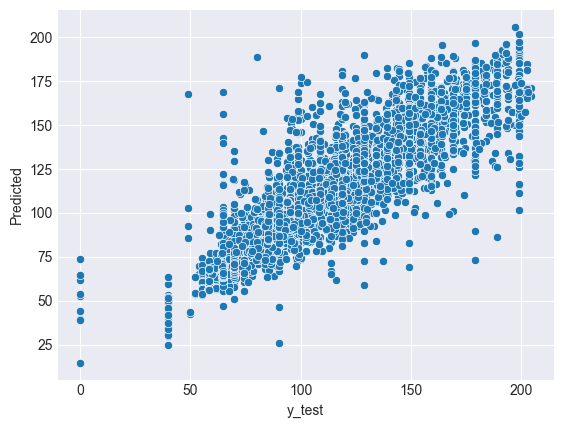

CPU times: user 57.4 s, sys: 1.82 s, total: 59.2 s
Wall time: 33.3 s


,Actual,Prediction,Diff
0,189.00,86.323067,102.68
1,123.70,111.594955,12.11
2,103.55,96.572670,6.98
3,70.00,69.865578,0.13
4,149.00,146.425064,2.57
...,...,...,...
7780,107.10,107.425079,-0.33
7781,98.80,100.043076,-1.24
7782,70.00,71.065361,-1.07
7783,85.50,104.882736,-19.38


In [66]:
%%time 

xgb_tunned_grid = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=8,
             min_child_weight=1,
             n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
model_xgb_tunned_grid, df_rf_xgb_tunned_grid = model(xgb_tunned_grid, X_train, y_train, X_test, y_test, X, y)
df_rf_xgb_tunned_grid

ML Algorithm     : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=60, n_jobs=0, num_parallel_tree=1, predictor=None,
             random_state=11, ...)
R2 Score (train) : 0.8718850662445133
R2 Score (test)  : 0.8209217123872697
CV Scores        : [0.73935375 0.79829521 0.70762867 0.76076974 0.72094673]
CV Scores mean   : 0.7453988205196526
MAE rate         : 9.181106724253356
MSE rate         : 197

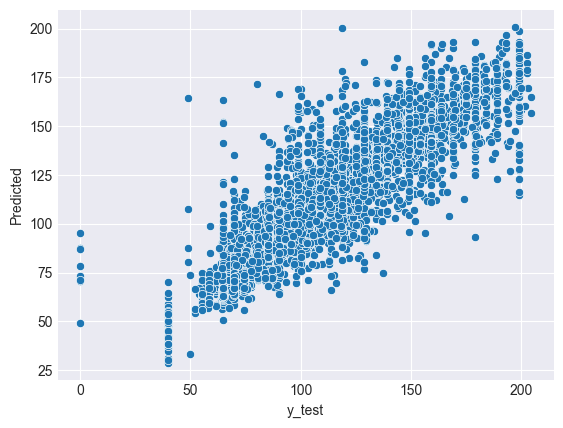

,Actual,Prediction,Diff
0,189.00,122.883469,66.12
1,123.70,109.478058,14.22
2,103.55,98.217384,5.33
3,70.00,69.949066,0.05
4,149.00,141.948853,7.05
...,...,...,...
7780,107.10,101.700584,5.40
7781,98.80,105.387405,-6.59
7782,70.00,70.918114,-0.92
7783,85.50,103.699532,-18.20


In [69]:
xgb_tunned_grid = XGBRegressor(n_estimators=60, n_jobs=0, num_parallel_tree=1, random_state=11)
model_xgb_tunned_grid, df_rf_xgb_tunned_grid = model(xgb_tunned_grid, X_train, y_train, X_test, y_test, X, y)
df_rf_xgb_tunned_grid

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [70]:
# Setting SEED for reproducibility
SEED = 1
  
# Importing the dataset 


  
# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = SEED)
  
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = SEED)
  
# Fit to training set
gbr.fit(train_X, train_y)
  
# Predict on test set
pred_y = gbr.predict(test_X)

scr = gbr.score(train_X, train_y)
# test set RMSE
test_rmse = MSE(test_y, pred_y) ** (1 / 2)
  
# Print rmse
print('score test set: {:.2f}'.format(scr))

score test set: 0.63


In [71]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [72]:
model = XGBRegressor(n_estimators=60, n_jobs=0, num_parallel_tree=1, random_state=11)

In [73]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=60, n_jobs=0, num_parallel_tree=1, predictor=None,
             random_state=11, ...)

In [74]:
ypred = model.predict( X_test)
ypred

array([122.88347 , 109.47806 ,  98.217384, ...,  70.91811 , 103.69953 ,
        89.33087 ], dtype=float32)

In [75]:

xg_reg = XGBRegressor(n_estimators=60, n_jobs=0, num_parallel_tree=1, random_state=11)

xg_reg.fit(X_train,y_train)

kfold = KFold(n_splits=15)
results = cross_val_score(xg_reg, X_train, y_train, cv=kfold)
y_test_pred = xg_reg.predict(X_test)

mse = mean_squared_error(y_test_pred, y_test)

y_pred = xg_reg.predict(X_test)

# pd.DataFrame(y_pred).to_csv('competitionsubmission.csv',index=False)

In [76]:
mse

197.59942068512328

In [77]:
xg_reg.score(X_train, y_train)

0.8718850662445133

In [78]:
xg_reg.score(X_test, y_test)

0.8209217123872697

Month,	  Days , 	week_number	 , DayOfWeek	,  Nights	,  Type	 , RateCode , 	TrackCode , 	  Occupied  ,  	ADR	

In [79]:
Date = 2022/12/11
Los = 1
Type = NQQ
RateCode = BAR
TrackCode = Leisure
Occupied = 88
Adr = 94.80

In [80]:
sn = [[date, Los, Type, RateCode, TrackCode, Occupied, Adr]]

In [81]:
xg_reg.predict(sn)

array([110.15114], dtype=float32)

In [89]:
 pip install pmdarima

1560.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [90]:

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller

import pmdarima as pm

In [114]:
dates = []
for y, m , d  in zip(df['Year'], ex['Month'], ex['Days']):

    date=str(y)+'-'+str(m)+'-'+str(d)
    dates.append(date)
print(len(dates))

26348


In [115]:
df1['Dates'] = dates
df1["Dates"] = pd.to_datetime(dates)

In [116]:
df1

,Month,Days,week_number,DayOfWeek,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate,Dates
0,1,22,4,5,1,3,1,1,100,120.28,125,2022-01-22
1,1,25,5,1,1,7,107,3,93,75.62,76,2022-01-25
2,1,5,2,2,1,1,64,1,82,73.67,80,2022-01-05
3,1,3,2,0,1,3,9,1,93,73.59,74,2022-01-03
4,1,13,3,3,1,3,24,0,98,91.08,70,2022-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...
26343,12,12,3,0,1,7,71,4,85,84.80,89,2022-12-12
26344,12,24,4,5,4,6,96,0,76,89.42,127,2022-12-24
26345,12,7,2,2,1,2,41,3,80,80.65,93,2022-12-07
26346,12,4,2,6,1,1,25,0,95,105.30,70,2022-12-04


In [94]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df1['Rate'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.421362e+01
p-value                        1.704662e-26
#Lags Used                     4.900000e+01
Number of Observations Used    2.629800e+04
Critical Value (1%)           -3.430599e+00
Critical Value (5%)           -2.861650e+00
Critical Value (10%)          -2.566829e+00
dtype: float64


In [93]:
ARIMA_model = pm.auto_arima(df1['Rate'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

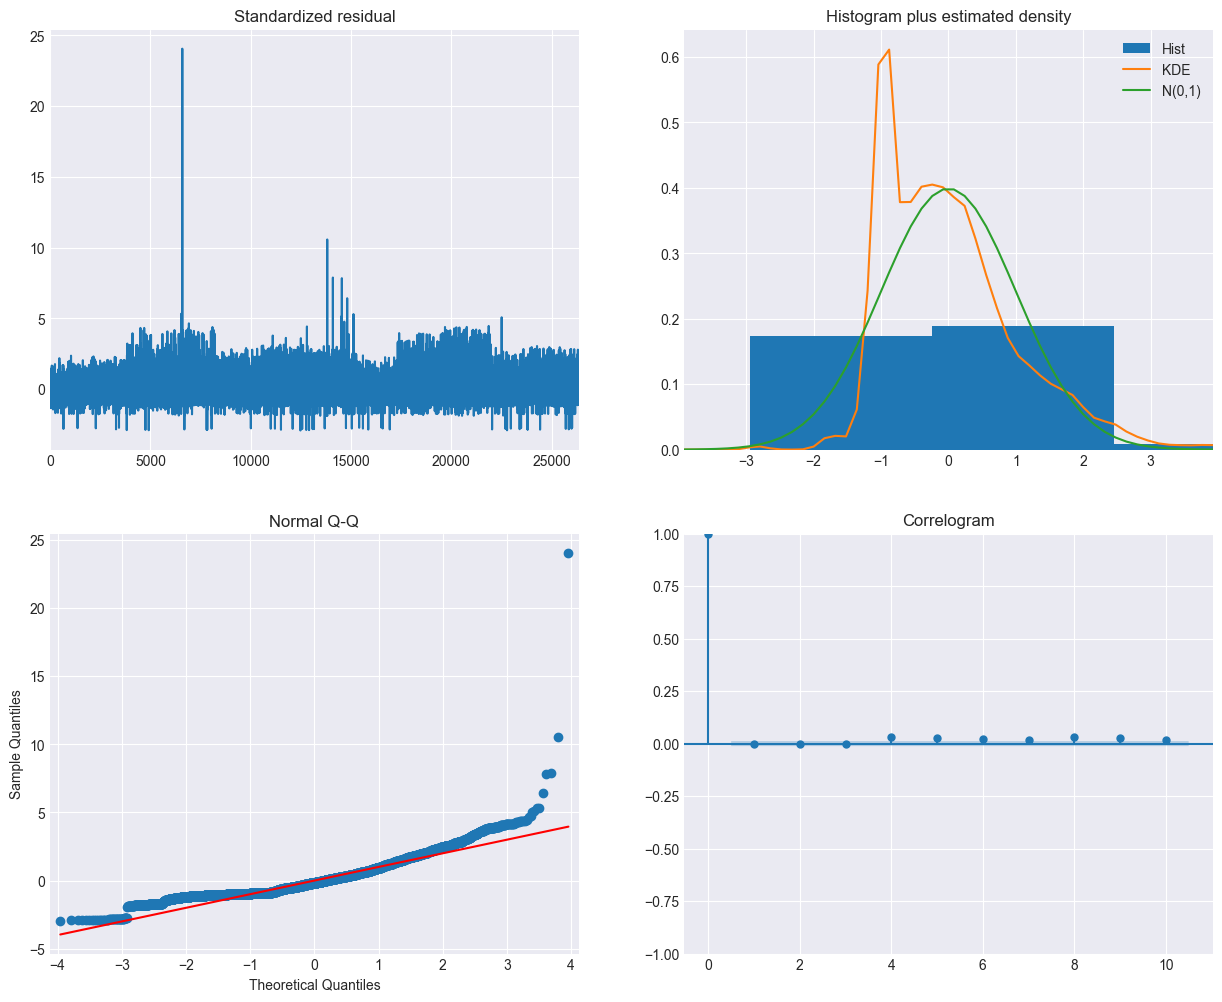

In [95]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [118]:
def forecast(ARIMA_model, periods=12):
    
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df1.index[-1] + pd.DateOffset(Month=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 10], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df["Rate"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Airline Rate")
    plt.show()

forecast(ARIMA_model)

TypeError: 'Month' is an invalid keyword argument for __new__()

In [96]:
SARIMA_model = pm.auto_arima(df1["Rate"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

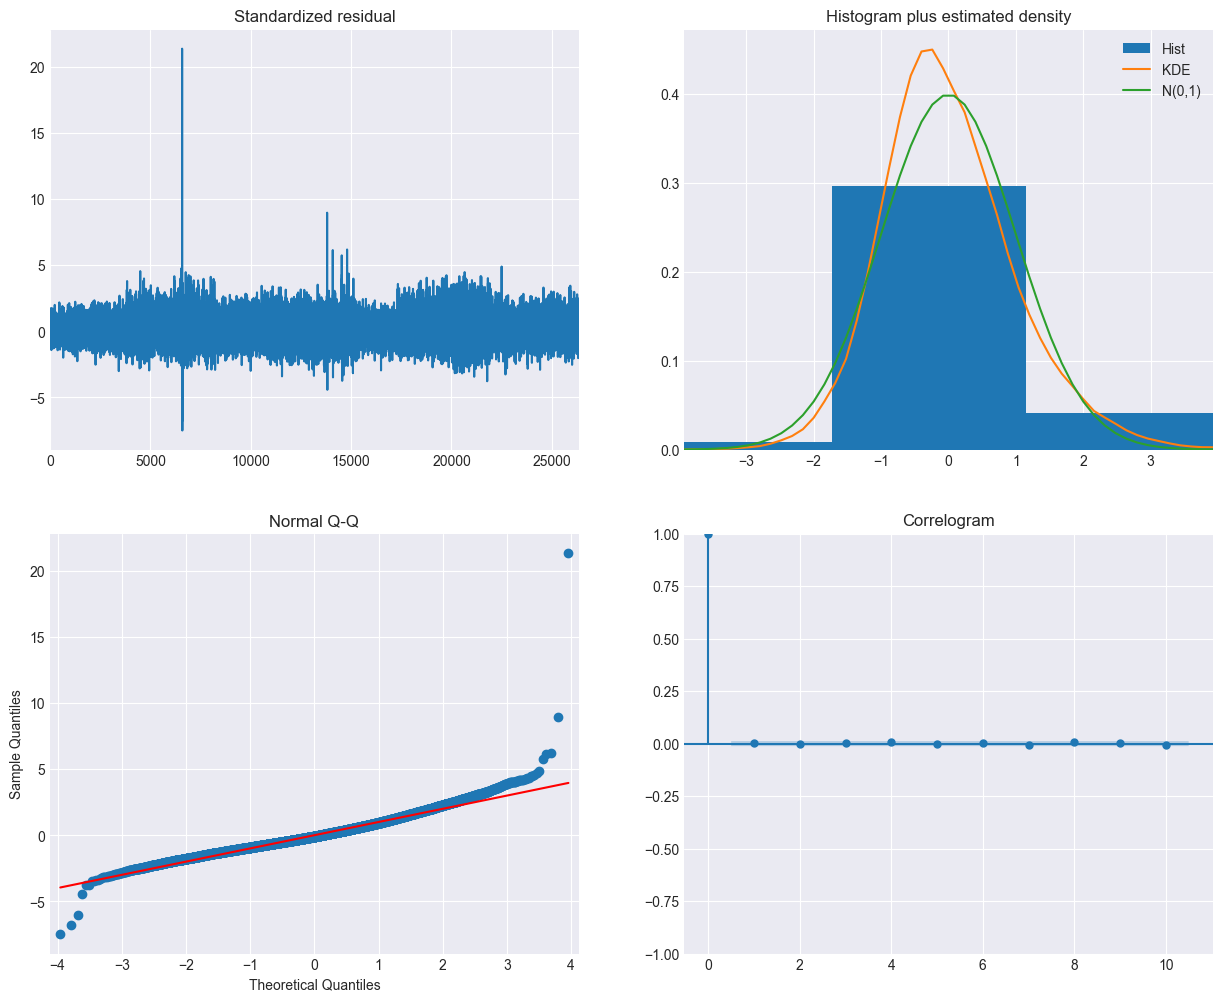

In [97]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [98]:
forecast(SARIMA_model)

NameError: name 'forecast' is not defined